In [43]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.special import betainc

In [44]:
correlationPath = 'Correlation'
with open(correlationPath + '/' + 'result-parallel-0.json', "r") as file:
    data = json.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'Correlation/result-parallel-0.json'

In [ ]:
data

In [19]:
methods = ['openRarity', 'rarityTools', 'tournament']
results = {}
for method in methods:
    results[method] = {}
for item in data:
    collection = list(item.keys())[0]
    for method in methods:
        results[method][collection] = {}
        results[method][collection]['Fitted Train'] = item[collection][method]['fitted']['funTrain']
        results[method][collection]['Fitted Test'] = item[collection][method]['fitted']['funTest']
        results[method][collection]['Unfitted'] = item[collection][method]['unfitted']['fun']

In [20]:
results['openRarity']

{'VFT': {'Fitted Train': -0.3885098904671498,
  'Fitted Test': -0.11361413841685755,
  'Unfitted': -0.10715395602830816},
 'CBC': {'Fitted Train': -0.36390299289823147,
  'Fitted Test': -0.09725055681106091,
  'Unfitted': -0.07807550315181122},
 'SD': {'Fitted Train': -0.4205772398339321,
  'Fitted Test': -0.1654232170778611,
  'Unfitted': -0.1569760638144677},
 'ODDITIES': {'Fitted Train': -0.1738371684969148,
  'Fitted Test': -0.015101460848583523,
  'Unfitted': 0.005646814735795106},
 'AZUKI': {'Fitted Train': -0.5219100499791259,
  'Fitted Test': -0.05124466632774643,
  'Unfitted': -0.027396797560764703},
 'TERRAFORMS': {'Fitted Train': -0.14107979417560382,
  'Fitted Test': -0.14398413282254252,
  'Unfitted': 0.21495336789014863},
 '0N1': {'Fitted Train': -0.41433700956693365,
  'Fitted Test': 0.009202448055966778,
  'Unfitted': -0.0003911570532102344},
 'HAPE': {'Fitted Train': -0.18840488581449813,
  'Fitted Test': -0.1612481249092571,
  'Unfitted': -0.08578637326171897}}

In [28]:
openRarityFittedTrain = []
for collection in list(results['openRarity'].keys()):
    openRarityFittedTrain.append(-results['openRarity'][collection]['Fitted Train'])
openRarityFittedTrain.sort()
openRarityFittedTrain

[0.14107979417560382,
 0.1738371684969148,
 0.18840488581449813,
 0.36390299289823147,
 0.3885098904671498,
 0.41433700956693365,
 0.4205772398339321,
 0.5219100499791259]

In [31]:
rarityToolsFittedTrain = []
for collection in list(results['rarityTools'].keys()):
    rarityToolsFittedTrain.append(-results['rarityTools'][collection]['Fitted Train'])
rarityToolsFittedTrain.sort()
rarityToolsFittedTrain

[0.13991020290008063,
 0.15885995364965066,
 0.18858333997277243,
 0.35423311173786737,
 0.3876729259999414,
 0.4122411049049791,
 0.42144573147530834,
 0.5299044183313415]

In [32]:
tournamentFittedTrain = []
for collection in list(results['tournament'].keys()):
    tournamentFittedTrain.append(-results['tournament'][collection]['Fitted Train'])
tournamentFittedTrain.sort()
tournamentFittedTrain

[0.12870966675521786,
 0.14722095993383047,
 0.18689080602183109,
 0.3458208921170008,
 0.38503091123923056,
 0.40814844062446276,
 0.4140932617188772,
 0.5044891259212892]

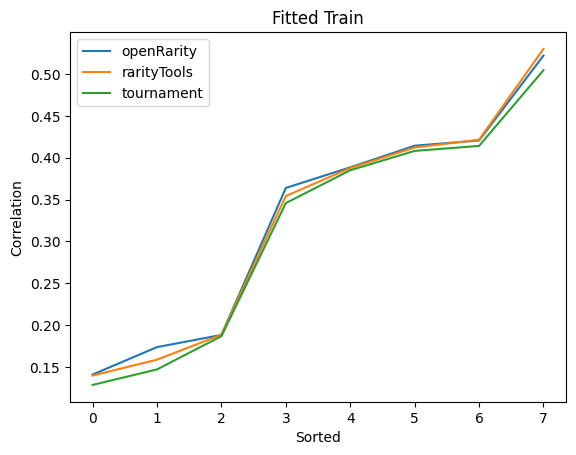

In [34]:
plt.plot(openRarityFittedTrain, label='openRarity')
plt.plot(rarityToolsFittedTrain, label='rarityTools')
plt.plot(tournamentFittedTrain, label='tournament')
plt.title('Fitted Train')
plt.xlabel('Sorted')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [35]:
openRarityFittedTest = []
for collection in list(results['openRarity'].keys()):
    openRarityFittedTest.append(-results['openRarity'][collection]['Fitted Test'])
openRarityFittedTest.sort()
openRarityFittedTest

[-0.009202448055966778,
 0.015101460848583523,
 0.05124466632774643,
 0.09725055681106091,
 0.11361413841685755,
 0.14398413282254252,
 0.1612481249092571,
 0.1654232170778611]

In [36]:
rarityToolsFittedTest = []
for collection in list(results['rarityTools'].keys()):
    rarityToolsFittedTest.append(-results['rarityTools'][collection]['Fitted Test'])
rarityToolsFittedTest.sort()
rarityToolsFittedTest

[-0.0033768117364952506,
 0.019327785727147998,
 0.05417496043776704,
 0.07988622914859572,
 0.12271644190444796,
 0.14385894572299665,
 0.1639181201745955,
 0.16808205607952437]

In [37]:
tournamentFittedTest = []
for collection in list(results['tournament'].keys()):
    tournamentFittedTest.append(-results['tournament'][collection]['Fitted Test'])
tournamentFittedTest.sort()
tournamentFittedTest

[-0.013598519976542314,
 0.01779828292774185,
 0.04320561686985863,
 0.07327828688921012,
 0.12416058706029474,
 0.14285051841120625,
 0.15617735911864605,
 0.161175562603262]

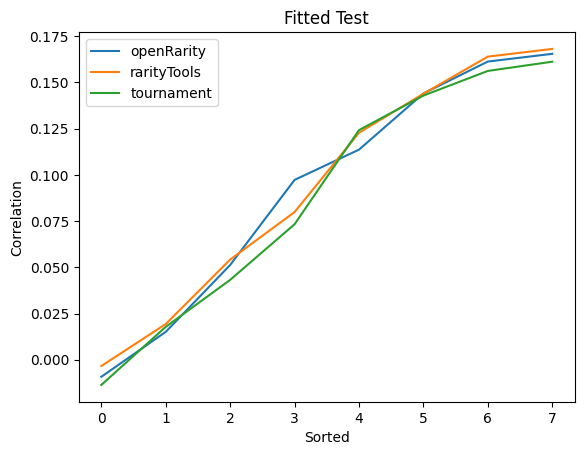

In [39]:
plt.plot(openRarityFittedTest, label='openRarity')
plt.plot(rarityToolsFittedTest, label='rarityTools')
plt.plot(tournamentFittedTest, label='tournament')
plt.title('Fitted Test')
plt.xlabel('Sorted')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [40]:
openRarityUnfitted = []
for collection in list(results['openRarity'].keys()):
    openRarityUnfitted.append(-results['openRarity'][collection]['Unfitted'])
openRarityUnfitted.sort()
openRarityUnfitted

[-0.21495336789014863,
 -0.005646814735795106,
 0.0003911570532102344,
 0.027396797560764703,
 0.07807550315181122,
 0.08578637326171897,
 0.10715395602830816,
 0.1569760638144677]

In [41]:
rarityToolsUnfitted = []
for collection in list(results['rarityTools'].keys()):
    rarityToolsUnfitted.append(-results['rarityTools'][collection]['Unfitted'])
rarityToolsUnfitted.sort()
rarityToolsUnfitted

[-0.006017645400488179,
 -0.0020685145116852944,
 0.029293116301521465,
 0.05503564405493873,
 0.059241631656703764,
 0.08304576831283164,
 0.09114907973844574,
 0.1637277436636652]

In [42]:
tournamentUnfitted = []
for collection in list(results['tournament'].keys()):
    tournamentUnfitted.append(-results['tournament'][collection]['Unfitted'])
tournamentUnfitted.sort()
tournamentUnfitted

[-0.008938910240056297,
 -0.001730988432758995,
 0.025585834878755175,
 0.035219967083718426,
 0.05601358908870215,
 0.08270262939139732,
 0.10624238657277199,
 0.1475578521993723]

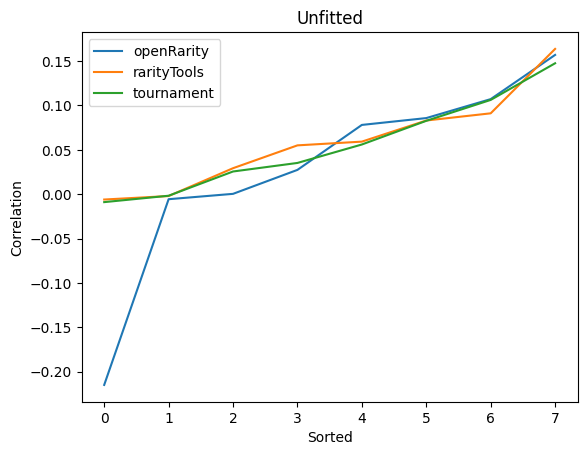

In [43]:
plt.plot(openRarityUnfitted, label='openRarity')
plt.plot(rarityToolsUnfitted, label='rarityTools')
plt.plot(tournamentUnfitted, label='tournament')
plt.title('Unfitted')
plt.xlabel('Sorted')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [69]:
correlationNewPath = '/Users/kevin/Downloads/collection-results/all-collection-results'
correlationComboPath = '/Users/kevin/Downloads/merged-new'

filenamesNew = []
for path in os.listdir(correlationNewPath):
    if os.path.isfile(os.path.join(correlationNewPath, path)):
        filenamesNew.append(path)
filenamesNew.remove('.DS_Store')
filenamesCombo = []
for path in os.listdir(correlationComboPath):
    if os.path.isfile(os.path.join(correlationComboPath, path)):
        filenamesCombo.append(path)
filenamesCombo.remove('.DS_Store')
d = {j:i for i, j in enumerate(filenamesCombo)}
mismatch = sorted(list((set(filenamesCombo) - set(filenamesNew))), key = lambda x: d[x])
assert len(mismatch) == 0, 'Mismatch: ' + str(mismatch)

In [70]:
correlationNewPath = '/Users/kevin/Downloads/collection-results/all-collection-results'
correlationComboPath = '/Users/kevin/Downloads/openrarityfull'

filenamesNew = []
for path in os.listdir(correlationNewPath):
    if os.path.isfile(os.path.join(correlationNewPath, path)):
        filenamesNew.append(path)
filenamesNew.remove('.DS_Store')
filenamesCombo = []
for path in os.listdir(correlationComboPath):
    if os.path.isfile(os.path.join(correlationComboPath, path)):
        filenamesCombo.append(path)
filenamesCombo.remove('.DS_Store')
d = {j:i for i, j in enumerate(filenamesCombo)}
mismatch = sorted(list((set(filenamesCombo) - set(filenamesNew))), key = lambda x: d[x])
assert len(mismatch) == 0, 'Mismatch: ' + str(mismatch)

In [71]:
num_prob = len(filenamesNew)
# 4 rarity meters: openRarity, rarityTools, tournament, combo; 3 metrics: fitted Train, fitted Test, Unfitted
num_method = 4 * 3 
dataAll = np.zeros((num_prob, num_method))
collections = []

In [72]:
def perf_prof(data, data_names, plot_name='None', tau_min=0.0, tau_max=1.0, npts=1000):
    num_prob, num_method = data.shape

    # Compute the distances between optimal method and others for each problem
    dist = np.zeros((num_prob, num_method)) 
    for prob in range(num_prob):
        dist[prob] = abs(np.max(data[prob]) - data[prob])#abs(1 - data[prob]) # - np.min(data[prob])
                
    # Compute the cumulative rates of the distance being less than a fixed threshold
    rho = np.zeros((npts, num_method))
    tau = np.linspace(tau_min, tau_max, npts)
    for method in range(num_method):
        for k in range(npts):
            rho[k, method] = np.sum(dist[:, method] < tau[k]) / num_prob
    
    # make plot
    #colors = [ '#2D328F', '#F15C19',"#81b13c","#ca49ac","000000"]
    label_fontsize = 18
    legend_fontsize = 10
    tick_fontsize = 14
    linewidth = 3
    
    plt.figure(figsize=(10, 8))
    
    for method in range(num_method):
        #plt.plot(tau, rho[:, method], color=colors[method], linewidth=linewidth, label=data_names[method])
        plt.plot(tau, rho[:, method], linewidth=linewidth, label=data_names[method])
        
    plt.xlabel(r'$\tau$',fontsize=label_fontsize)
    plt.ylabel(r'$\rho_m(\tau)$',fontsize=label_fontsize)
    plt.legend(fontsize=legend_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.title(plot_name, fontsize=label_fontsize)
    plt.grid(True)
    plt.show()

In [73]:
for i, filename in enumerate(filenamesNew):
    
    with open(correlationNewPath + '/' + filename, 'r') as file:
        data = json.load(file)
        
    with open('/Users/kevin/Downloads/merged-new' + '/' + filename, 'r') as file:
        dataCombo = json.load(file)
        
    with open("/Users/kevin/Downloads/openrarityfull" + '/' + filename, 'r') as file:
        dataOpenrarity = json.load(file)
        
    collection = filename[filename.rfind('-') + 1:filename.rfind('.')]
    collections.append(collection)
    
    dataAll[i, 0] = -dataOpenrarity[collection]['openRarity']['fitted']['funTrain']
    dataAll[i, 1] = -dataOpenrarity[collection]['openRarity']['fitted']['funTest']
    dataAll[i, 2] = -dataOpenrarity[collection]['openRarity']['unfitted']['fun']
    
    dataAll[i, 3] = -data[collection]['rarityTools']['fitted']['funTrain']
    dataAll[i, 4] = -data[collection]['rarityTools']['fitted']['funTest']
    dataAll[i, 5] = -data[collection]['rarityTools']['unfitted']['fun']
    
    dataAll[i, 6] = -data[collection]['tournament']['fitted']['funTrain']
    dataAll[i, 7] = -data[collection]['tournament']['fitted']['funTest']
    dataAll[i, 8] = -data[collection]['tournament']['unfitted']['fun']
    
    dataAll[i, 9] = -dataCombo[collection]['finalResult']['fitted']['funTrain']
    dataAll[i, 10] = -dataCombo[collection]['finalResult']['fitted']['funTest']
    dataAll[i, 11] = -dataCombo[collection]['finalResult']['unfitted']['fun']

print(dataAll)
print(len(dataAll))

[[0.26364333 0.24396652 0.2061067  ... 0.29609895 0.28352794 0.28237748]
 [0.57350944 0.30229324 0.0660037  ... 0.59170843 0.27173517 0.27742747]
 [0.10505478 0.03922589 0.01719783 ... 0.10807336 0.04734188 0.04692203]
 ...
 [0.62921759 0.13239162 0.06848613 ... 0.60903006 0.14276889 0.03814601]
 [0.88079107 0.4516358  0.43996123 ... 0.89923743 0.47884617 0.48281668]
 [0.31239744 0.16856805 0.13434393 ... 0.3692747  0.20843765 0.19794987]]
85


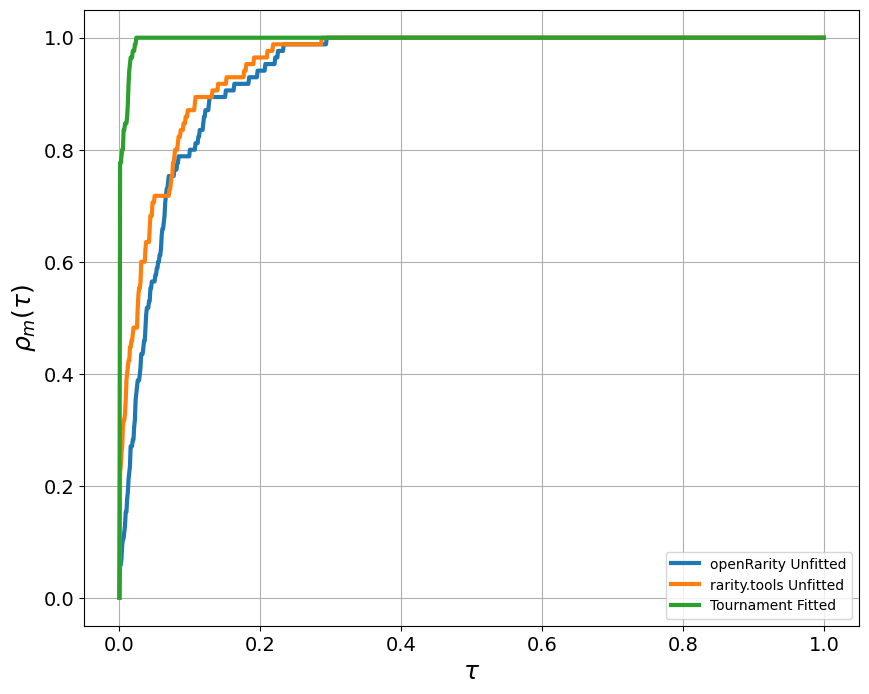

In [75]:
perf_prof(dataAll[:, [2, 5, 7]], ['openRarity Unfitted', 'rarity.tools Unfitted', 'Tournament Fitted'],"")

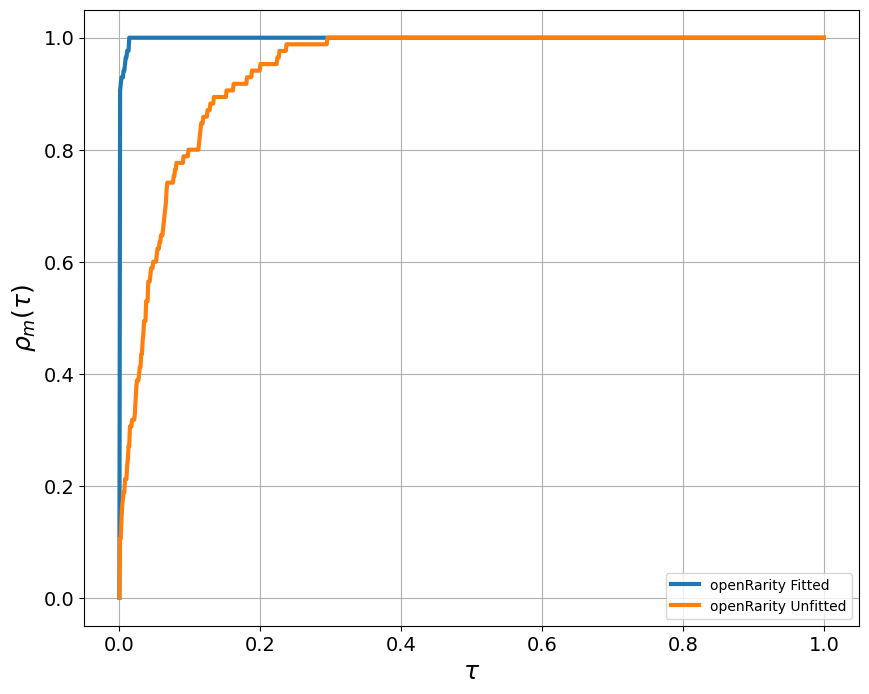

In [76]:
perf_prof(dataAll[:, [1, 2]], ['openRarity Fitted', 'openRarity Unfitted'], '')

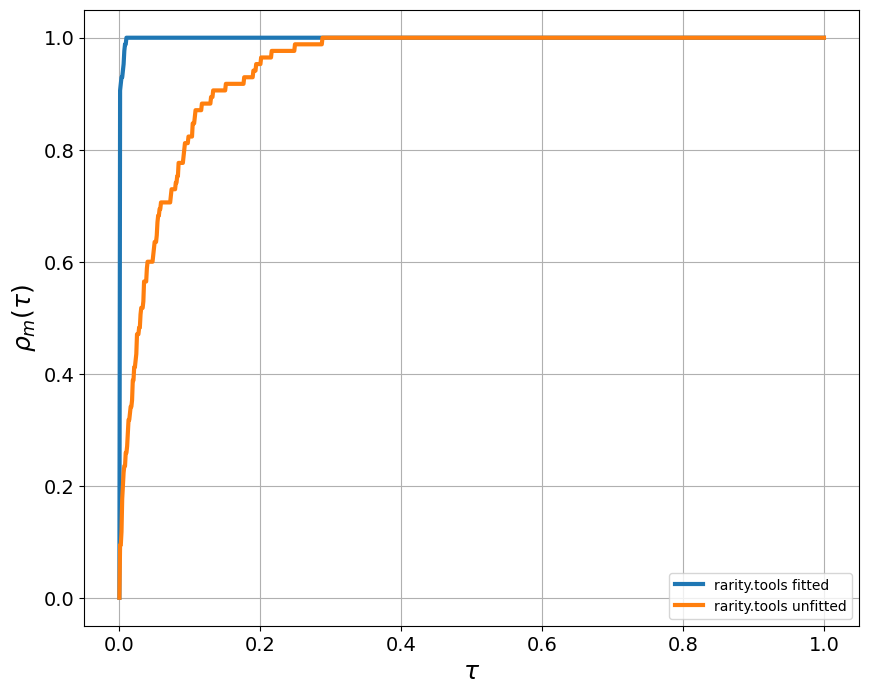

In [77]:
perf_prof(dataAll[:, [4, 5]], ['rarity.tools fitted', 'rarity.tools unfitted'], '')

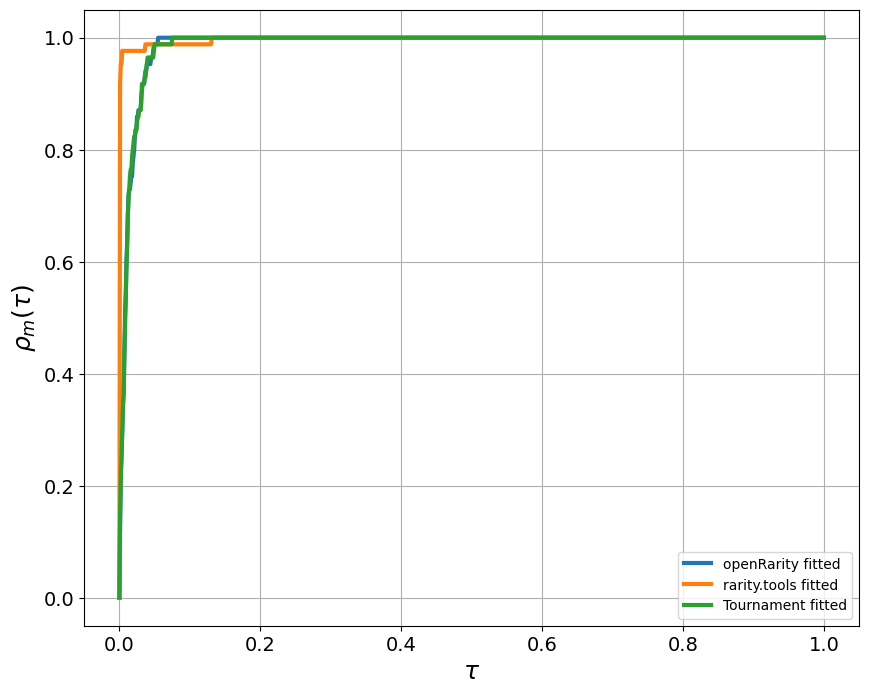

In [78]:
perf_prof(dataAll[:, [1, 4, 7]], ['openRarity fitted', 'rarity.tools fitted', 'Tournament fitted'], '')

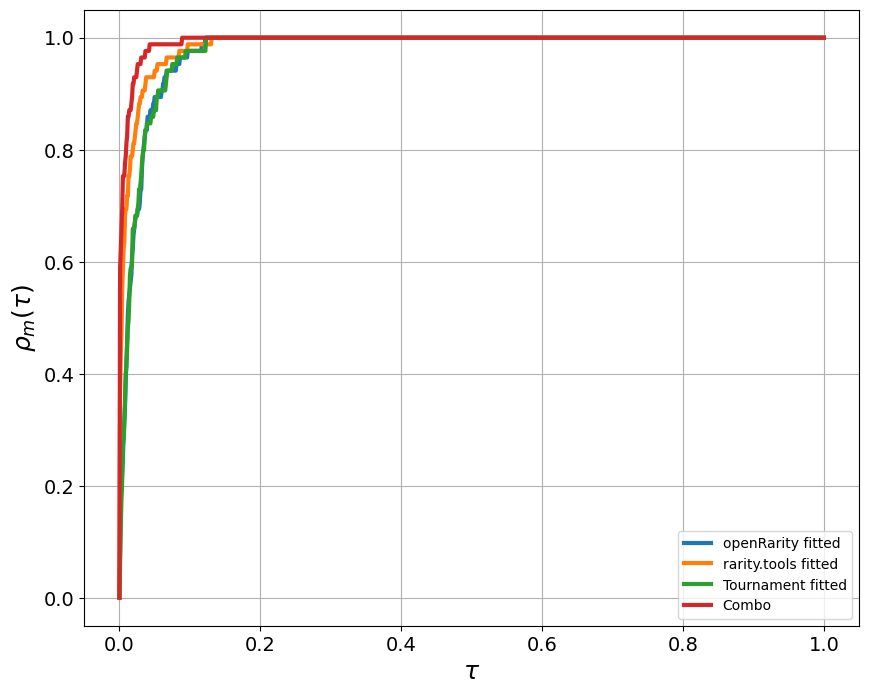

In [79]:
perf_prof(dataAll[:, [1, 4, 7, 10 ]], ['openRarity fitted', 'rarity.tools fitted', 'Tournament fitted', 'Combo'], '')

In [ ]:
perf_prof(dataAll[:, [1, 2]], ['openRarity Fitted', 'openRarity Unfitted'], 'OpenRarity Comparison')

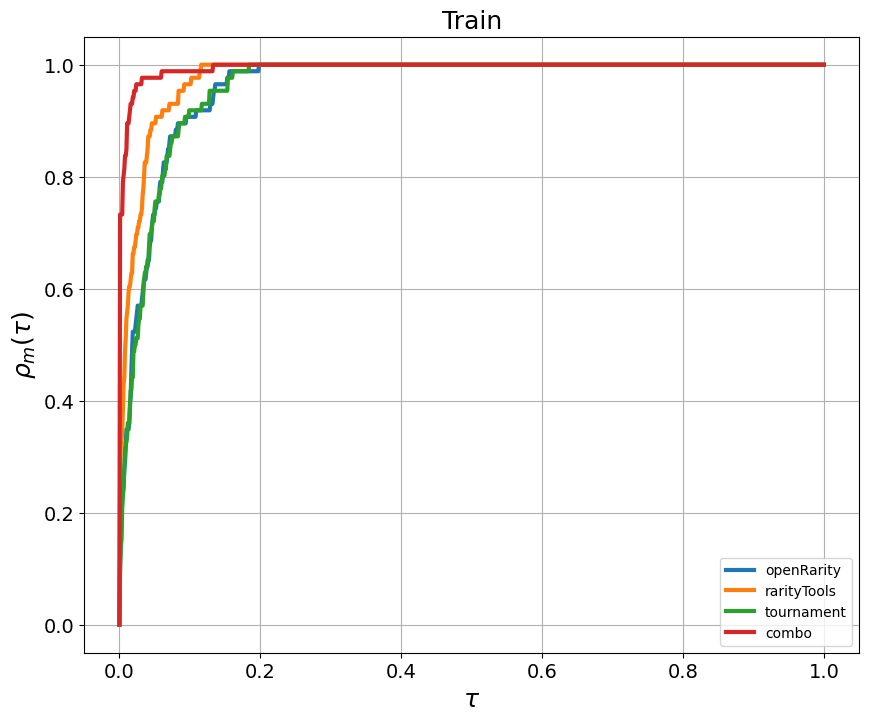

In [66]:
perf_prof(dataAll[:, [0, 3, 6, 9]], ['openRarity', 'rarityTools', 'tournament', 'combo'], 'Train')

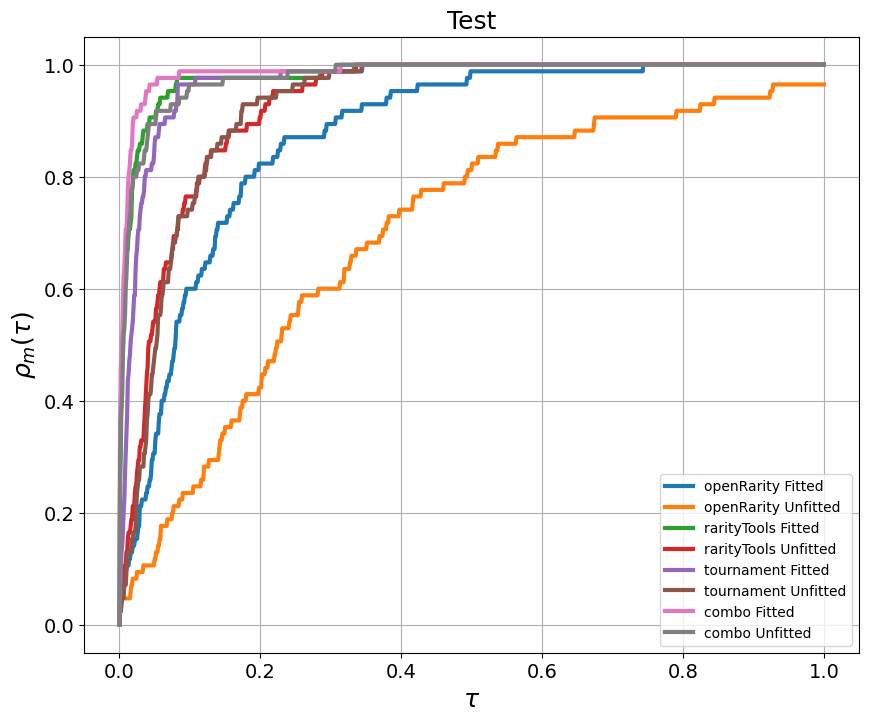

In [279]:
perf_prof(dataAll[:, [1, 2, 4, 5, 7, 8, 10, 11]], ['openRarity Fitted', 'openRarity Unfitted', 'rarityTools Fitted', 'rarityTools Unfitted', 'tournament Fitted', 'tournament Unfitted', 'combo Fitted', 'combo Unfitted'], 'Test')

In [300]:
def sorted_corr(data, data_names, plot_name='None'):
    label_fontsize = 18
    legend_fontsize = 10
    tick_fontsize = 14
    linewidth = 1
    plt.figure(figsize=(10, 8))
    
    for method in range(data.shape[1]):
        plt.plot(sorted(data[:, method]), linewidth=linewidth, label=data_names[method])
        
    plt.xlabel(r'Sorted', fontsize=label_fontsize)
    plt.ylabel(r'Correlation', fontsize=label_fontsize)
    plt.legend(fontsize=legend_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.title(plot_name, fontsize=label_fontsize)
    plt.grid(True)
    plt.show()

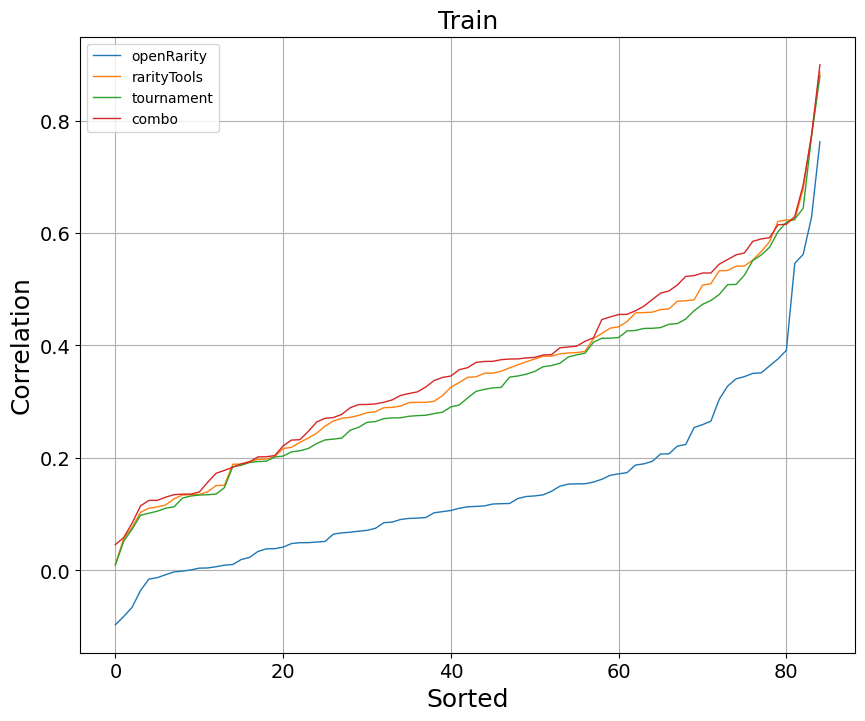

In [301]:
sorted_corr(dataAll[:, [0, 3, 6, 9]], ['openRarity', 'rarityTools', 'tournament', 'combo'], 'Train')

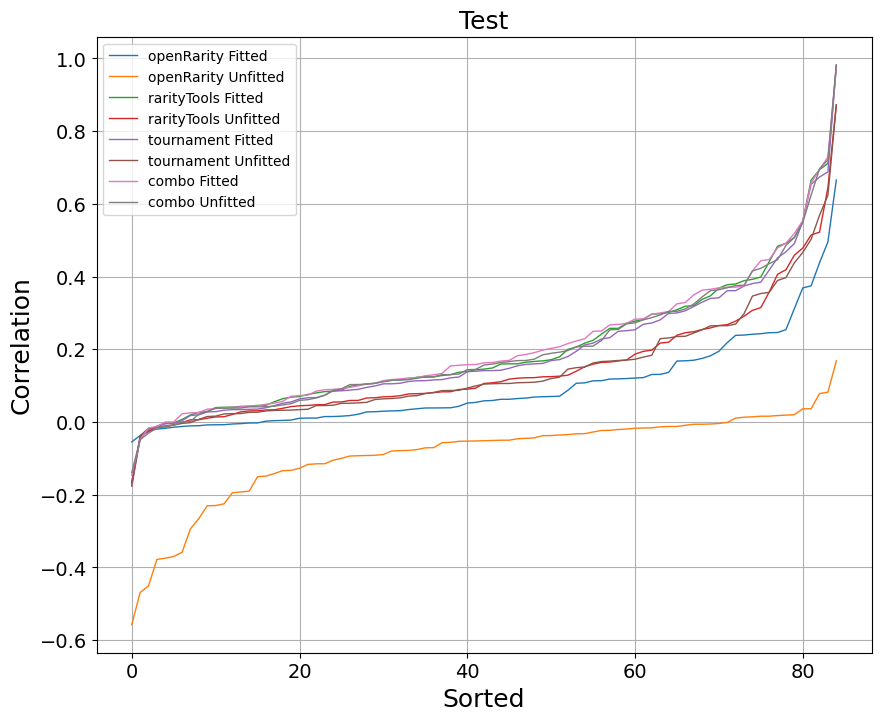

In [302]:
sorted_corr(dataAll[:, [1, 2, 4, 5, 7, 8, 10, 11]], ['openRarity Fitted', 'openRarity Unfitted', 'rarityTools Fitted', 'rarityTools Unfitted', 'tournament Fitted', 'tournament Unfitted', 'combo Fitted', 'combo Unfitted'], 'Test')